###232 Michelson Interferometer
###Anpassen einer Gauss-/ Lorentzkurve an das Interferogramm einer LED
#### Jens Wagner 10/2015
<a  href="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/kohaerenzlaenge.ipynb"<font> Download this notebook</font></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot
from scipy import signal
%matplotlib inline

In [2]:
data=np.genfromtxt('data/NewFile2.CSV',delimiter=",",skip_header=2)  #Hier der Pfad zu Euren Daten eintragen

In [3]:
print(data)

[[-0.30688    -0.004              nan]
 [-0.30684     0.004              nan]
 [-0.30680001  0.004              nan]
 ..., 
 [ 0.34835997  0.                 nan]
 [ 0.3484      0.                 nan]
 [ 0.34843999  0.                 nan]]


In [4]:
t=data[:,0:1] #Zeit
Int=data[:,1:2] #Intensitaet

In [5]:
print(t)
print(np.shape(t))

[[-0.30688   ]
 [-0.30684   ]
 [-0.30680001]
 ..., 
 [ 0.34835997]
 [ 0.3484    ]
 [ 0.34843999]]
(16384, 1)


In [6]:
print(Int)

[[-0.004]
 [ 0.004]
 [ 0.004]
 ..., 
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]]


In [7]:
Int=Int[:, 0] #in 1D-array wandeln
t=t[:, 0]

In [8]:
print(np.shape(Int))
print(np.shape(t))

(16384,)
(16384,)


[-0.05, 0.11, -0.42, 0.42]

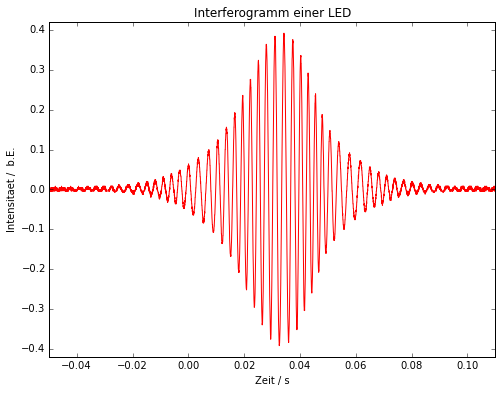

In [9]:
plt.figure(figsize=(8,6))
plt.plot(t,Int, color='red', linewidth=1)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.05, 0.11, -0.42, 0.42])

In [10]:
peakind = signal.find_peaks_cwt(Int, np.arange(1,30),noise_perc=20)

[-0.02, 0.08, -0.42, 0.42]

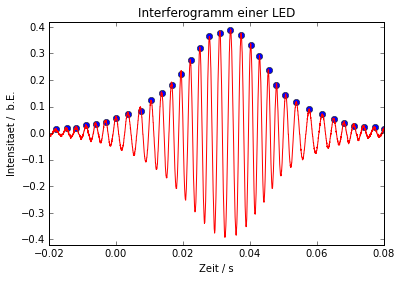

In [11]:
plt.plot(t[peakind], Int[peakind],marker='o',linewidth=0)
plt.plot(t,Int, color='red', linewidth=1)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.02, 0.08, -0.42, 0.42])

In [12]:
#Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
    return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

In [13]:
init_vals = [0.002, 0.032, 0.015]
fitParams, fitCovariances = curve_fit(fitFunc, t[peakind], Int[peakind],p0=init_vals)

[-0.05, 0.11, 0, 0.42]

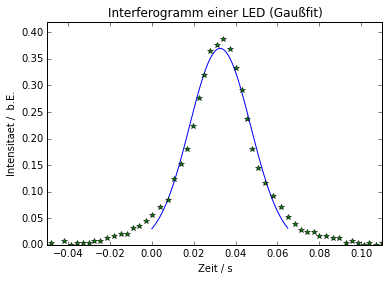

In [14]:
x=np.linspace(0,0.065,100) #x-Werte fuer die Fitfunktion 
plt.plot(x, fitFunc(x, fitParams[0], fitParams[1], fitParams[2]))
plt.plot(t[peakind], Int[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED (Gauﬂfit)')
plt.axis([-0.05, 0.11, 0, 0.42])

In [15]:
print("Sigmabreite=",fitParams[2],"s")
print("Halbwertsbreite=",2.355*fitParams[2],"s")

Sigmabreite= 0.0145742634974 s
Halbwertsbreite= 0.0343223905363 s


In [16]:
#Fitfunktion Lorentz
def lorentz(t, a, gamma, omega):
    return a/(2*np.pi)*gamma/((t-omega)**2+gamma**2/4)             

In [17]:
init_vals = [0.002, 0.02, 0.035]
fitParamsLorentz, fitCovariances = curve_fit(lorentz, t[peakind], Int[peakind],p0=init_vals)

[-0.05, 0.11, 0, 0.42]

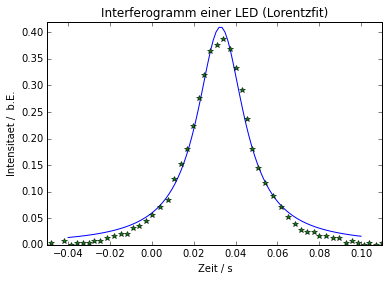

In [18]:
x=np.linspace(-0.04,0.1,100) #x-Werte fuer die Fitfunktion 
plt.plot(x, lorentz(x, fitParamsLorentz[0], fitParamsLorentz[1], fitParamsLorentz[2]))
plt.plot(t[peakind], Int[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED (Lorentzfit)')
plt.axis([-0.05, 0.11, 0, 0.42])

In [19]:
print("Halbwertsbreite=",fitParamsLorentz[1],"s")

Halbwertsbreite= 0.0271297373201 s


[-0.05, 0.11, 0, 0.42]

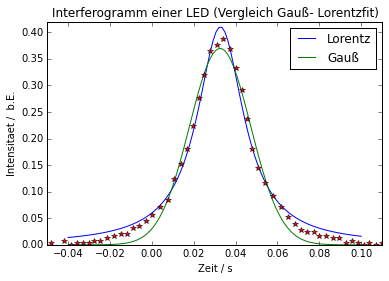

In [20]:
x=np.linspace(-0.04,0.1,100) #x-Werte fuer die Fitfunktion 
plt.plot(x, lorentz(x, fitParamsLorentz[0], fitParamsLorentz[1], fitParamsLorentz[2]),label="Lorentz")
plt.plot(x, fitFunc(x, fitParams[0], fitParams[1], fitParams[2]),label="Gauﬂ")
plt.legend()
plt.plot(t[peakind], Int[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED (Vergleich Gauﬂ- Lorentzfit)')
plt.axis([-0.05, 0.11, 0, 0.42])